<a href="https://colab.research.google.com/github/vcfq/Competencia-y-Regulaci-n/blob/main/Tarea_Emp%C3%ADrica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

Bases
------

In [ ]:
import pandas as pd

url_base1 = 'https://github.com/vcfq/Competencia-y-Regulaci-n/raw/refs/heads/main/base1.xlsx'
url_base2 = 'https://github.com/vcfq/Competencia-y-Regulaci-n/raw/refs/heads/main/base2.xlsx'

df_1 = pd.read_excel(url_base1)
df_2 = pd.read_excel(url_base2)

Estadísticas descriptivas
-----

**Prestadores en el tiempo**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

#merge de bases
df = df_1.merge(df_2, on="ciudad")
df["poblacion_total"] = df["poblacion_inicial"] * (1 + df["crecimiento_anual"]) ** (df["year"] - 2001)
df["porcentaje_operados"] = df["num_operados"] / df["poblacion_total"]
df.head()

,ciudad,year,prestador,num_operados,tecnologia_alta,infraestructura,puntaje_doctor,precio,poblacion_inicial,crecimiento_anual,poblacion_total,porcentaje_operados
0,1,2001,Clinica_B,2521.478838,0,6.993077,6.820721,9.458984,228037,0.056576,228037.000000,0.011057
1,1,2001,Clinica_A,3327.113736,0,8.313865,8.516229,10.584837,228037,0.056576,228037.000000,0.014590
2,1,2001,Clinica_C,2569.037947,0,5.452967,6.444618,9.180535,228037,0.056576,228037.000000,0.011266
3,1,2001,Publico,2512.660532,0,5.367397,8.169181,10.166758,228037,0.056576,228037.000000,0.011019
4,1,2002,Clinica_A,6000.304696,0,8.743796,8.838369,10.384828,228037,0.056576,240938.509024,0.024904


**Tablas de estadísticas**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

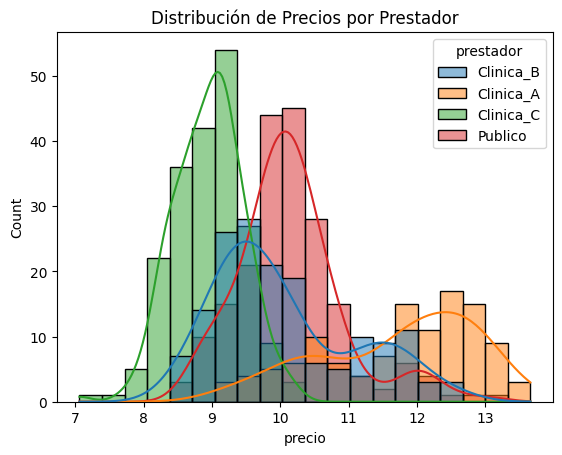

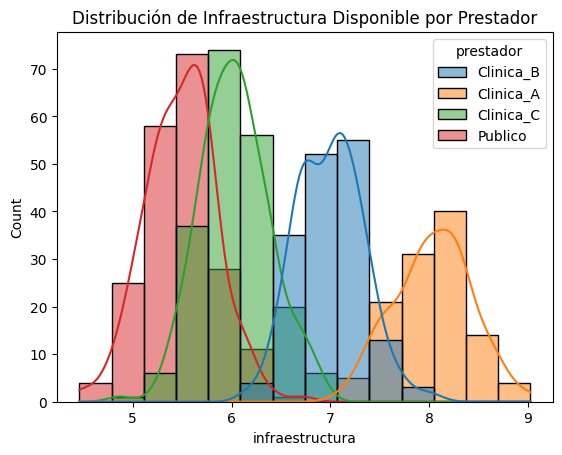

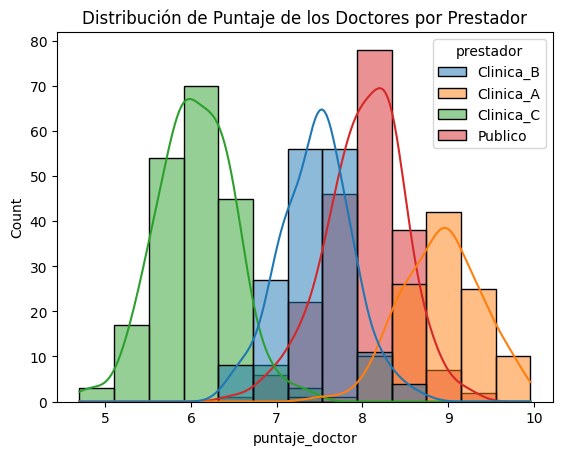

In [ ]:
#resumen de estadisticas por prestador
estadisticas = df.groupby("prestador").describe().round(2)
estadisticas.columns = ['_'.join(col).strip() for col in estadisticas.columns]
estadisticas.reset_index(inplace=True)

latex_output = estadisticas.to_latex(index=False, caption="Estadísticas descriptivas por prestador", label="tab:resumen_prestadores")
with open("resumen_prestadores.tex", "w") as f:
    f.write(latex_output)
files.download("resumen_prestadores.tex")

#resumen estadísticas por ciudad
estadisticas_ciudad = df.groupby("ciudad").describe().round(2)

estadisticas_ciudad.columns = ['_'.join(col).strip() for col in estadisticas_ciudad.columns]
estadisticas_ciudad.reset_index(inplace=True)

latex_ciudad = estadisticas_ciudad.to_latex(index=False, caption="Estadísticas descriptivas por ciudad", label="tab:resumen_ciudad")

with open("resumen_ciudad.tex", "w") as f:
    f.write(latex_ciudad)

from google.colab import files
files.download("resumen_ciudad.tex")

#gráficos de precio, infrestructura y puntaje del doctor por prestador
sns.histplot(df, x="precio", hue="prestador", kde=True)
plt.title("Distribución de Precios por Prestador")
plt.show()

sns.histplot(df, x="infraestructura", hue="prestador", kde=True)
plt.title("Distribución de Infraestructura Disponible por Prestador")
plt.show()

sns.histplot(df, x="puntaje_doctor", hue="prestador", kde=True)
plt.title("Distribución de Puntaje de los Doctores por Prestador")
plt.show()

**Proporción operados**

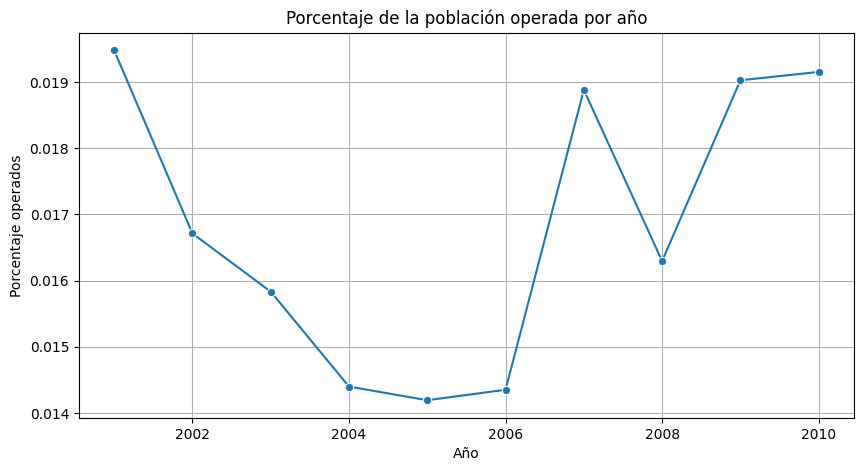

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#evolución operaciones
evolucion = df.groupby("year").agg({
    "num_operados": "sum",
    "poblacion_total": "sum"
}).reset_index()
evolucion["porcentaje_operados"] = evolucion["num_operados"] / evolucion["poblacion_total"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=evolucion, x="year", y="porcentaje_operados", marker="o")
plt.title("Porcentaje de la población operada por año")
plt.ylabel("Porcentaje operados")
plt.xlabel("Año")
plt.grid(True)
plt.savefig("evolucion_operaciones.pdf", format="pdf")
plt.show()
files.download("evolucion_operaciones.pdf")